## Imports Cell

In [99]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import numpy as np

## Load DataFrame

In [2]:
df = pd.read_csv("profiles.csv")

## Explore de Data

In [56]:
#df.job.head()
#df.job.value_counts()
#df.income.value_counts()
#df.offspring.value_counts()
#df.drugs.value_counts()
df.speaks.value_counts()
#df.body_type.value_counts()
#df.pets.value_counts()
#df.body_type.head()
#df.essay2.head()
#df.body_type.head()
#df.job.head()
#df.status.value_counts()
#The top 5-ish most interesting columns values provided in descending order are:
#... speaks
#... job,income
#... pets
#... body_type
#... sign


english                                                                                             21828
english (fluently)                                                                                   6628
english (fluently), spanish (poorly)                                                                 2059
english (fluently), spanish (okay)                                                                   1917
english (fluently), spanish (fluently)                                                               1288
english, spanish                                                                                      859
english (fluently), french (poorly)                                                                   756
english, spanish (okay)                                                                               655
english, spanish (poorly)                                                                             609
english (fluently), chinese (fluently)        

## Visualize Data

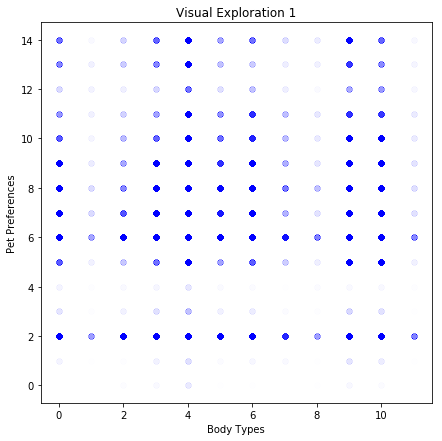

In [68]:
def numerate_body_types(keystr):
    if keystr != keystr:         #is_NaN
        keystr = 'rather not say'#default        
    body_type_map = {'rather not say':0, 'used up':1, 'skinny':2, 'thin':3, 'average':4, 'a little extra': 5, 'curvy':6, 'full figured':7, 'overweight':8, 'fit':9, 'athletic':10, 'jacked':11}
    return body_type_map[keystr]

def numerate_pets(keystr):
    if keystr != keystr:                           #is_NaN
        keystr = 'dislikes dogs and dislikes cats' #default
    # dislike=0, like=1, have_own_dog=2, have_own_cat=3 ... its an stylishness scale
    # pets_map = {'dislikes dogs':0,'dislikes cats':0,'dislikes dogs and dislikes cats':0,'dislikes dogs and likes cats':1,'dislikes dogs and has cats':2,'likes dogs and dislikes cats':1,'likes dogs and likes cats':2,'likes dogs':1,'likes dogs and has cats':4,'has dogs':2,'has dogs and likes cats':3,'has dogs and has cats':5,'has dogs and dislikes cats':2,'likes cats':1,'has cats':3}
    # unique grouping scale
    pets_map = {'dislikes dogs':0,'dislikes cats':1,'dislikes dogs and dislikes cats':2,'dislikes dogs and likes cats':3,'dislikes dogs and has cats':4,'likes dogs and dislikes cats':5,'likes dogs and likes cats':6,'likes dogs':7,'likes dogs and has cats':8,'has dogs':9,'has dogs and likes cats':10,'has dogs and has cats':11,'has dogs and dislikes cats':12,'likes cats':13,'has cats':14}
    return pets_map[keystr]
    
df_body_type = df['body_type'].apply(numerate_body_types)
df_pets = df['pets'].apply(numerate_pets)

#print(type(df_pets))   
#print(df_pets)
#print(len(df_body_type), len(df_pets))
plt.close('all')
plt.figure(figsize=(7,7))
plt.scatter(df_body_type, df_pets, color="b", alpha=0.005)
plt.xlabel("Body Types")
plt.ylabel("Pet Preferences")
plt.title("Visual Exploration 1")
#plt.show()
plt.savefig('body_types_vs_preferences.png');


In [234]:
def numerate_speaks(keystr):
    speaks_map = {'mandarin':20, 'spanish':19, 'english':18, 'hindi':17, 'arabic':16, 'portuguese':15, 'bengali':14, 'russian':13, 'japanese':12, 'punjabi':11, 'german':10, 'javanese':9, 'wu':8, 'malay':7, 'telugu':6, 'vietnamese':5, 'korean':4, 'french':3, 'marathi':2, 'tamil':1, 'other':1}
    if keystr != keystr:         #is_NaN or language not in top20 wikipedia
        keystr = 'other'         #default   
    else:
        lang_plus_quality_parts = keystr.split(' ')
        keystr = lang_plus_quality_parts[0]
        if keystr not in list(speaks_map):
            keystr = 'other'        
    return speaks_map[keystr]

language_scores_list = []
for speaksanswer in df['speaks']:
    lang_score = 0
    if isinstance(speaksanswer, float):
        pass
    else:
        lang_list = speaksanswer.split(',')
        crude_amt = len(lang_list)
        steno_amt = 0
        for lang in lang_list:
            steno_amt += numerate_speaks(lang)
        lang_score = crude_amt + steno_amt
    language_scores_list.append(lang_score)
df_langscore = pd.Series(language_scores_list)

#pd.DataFrame({})
print(type(df_langscore.value_counts()))
print(df_langscore.value_counts())

<class 'pandas.core.series.Series'>
19    29072
21    17227
23     8682
25     3249
27     1662
0        50
22        1
10        1
6         1
4         1
dtype: int64


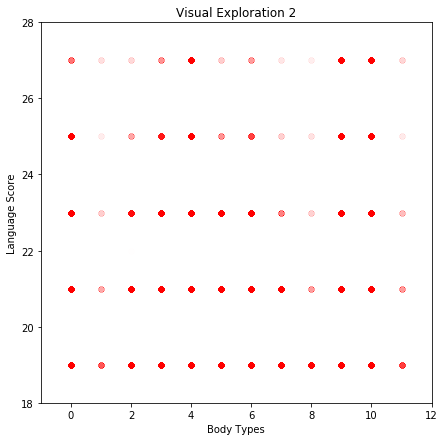

In [81]:
plt.close('all')
plt.figure(figsize=(7,7))
plt.scatter(df_body_type, df_langscore, color="r", alpha=0.005)
plt.xlabel("Body Types")
plt.ylabel("Language Score")
plt.title("Visual Exploration 2")
plt.axis([-1,12,18,28])
plt.show()

In [82]:
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

44564      48442
20000       2952
100000      1621
80000       1111
30000       1048
40000       1005
50000        975
60000        736
70000        707
150000       631
1000000      521
250000       149
500000        48
Name: income_meaned, dtype: int64
4.0     14652
9.0     12711
10.0    11819
3.0      4711
6.0      3924
5.0      2629
2.0      1777
7.0      1009
8.0       444
11.0      421
1.0       355
0.0       198
Name: bodytype_code, dtype: int64


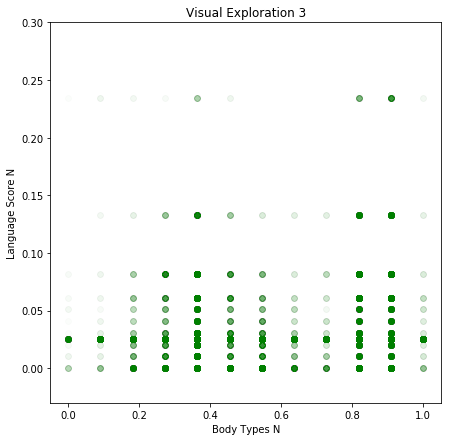

In [96]:
national_average = 44564
income_mapping = {-1:national_average, 20000:20000, 100000:100000, 80000:80000,30000:30000, 40000:40000, 50000:50000, 60000:60000, 70000:70000, 150000:150000,1000000:1000000, 250000:250000, 500000:500000}
df["income_meaned"] = df.income.map(income_mapping)
print(df.income_meaned.value_counts())

body_type_mapping = {'rather not say':0, 'used up':1, 'skinny':2, 'thin':3, 'average':4, 'a little extra': 5, 'curvy':6, 'full figured':7, 'overweight':8, 'fit':9, 'athletic':10, 'jacked':11}
df["bodytype_code"] = df.body_type.map(body_type_mapping)
print(df.bodytype_code.value_counts())

feature_data_wonan = df.dropna(subset=['bodytype_code', 'income_meaned'])
feature_data = feature_data_wonan[['bodytype_code', 'income_meaned']]
min_max_scaler = preprocessing.MinMaxScaler()
feature_data_scaled = min_max_scaler.fit_transform(feature_data)
feature_data = pd.DataFrame(feature_data_scaled, columns=feature_data.columns)


plt.close('all')
plt.figure(figsize=(7,7))
plt.scatter(feature_data['bodytype_code'], feature_data['income_meaned'], color="g", alpha=0.015)
plt.xlabel("Body Types N")
plt.ylabel("Language Score N")
plt.title("Visual Exploration 3")
plt.axis([-0.05,1.05, -0.03,0.3])
plt.show()


## Formulate My Question(s)

Can we predict body type from pet preference, language aptitude and essay answers?

## Augment the Data

In [112]:

pet_synonyms = ['cat', 'dog', 'beloved', 'treasure', 'jewel', 'darling', 'idol', 'beast', 'critter', 'mutt', 'stray']
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]


# Replacing the NaNs with empty strings
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

essay_petcounts = []
for essay in all_essays:
    pet_mentions_count = 0
    for synonym in pet_synonyms:
        pet_mentions_count += essay.count(synonym)
    essay_petcounts.append(pet_mentions_count)

essay_petcounts_series = pd.Series(essay_petcounts)
#essay_petcounts_series.head()
#essay_petcounts_series.value_counts()
    
#df["essay_petcount"] = all_essays.apply(lambda x: x.count(pet_synonyms[0]))
#for i in range(1,11):
#    synonym = pet_synonyms[i]
#    df["essay_petcount"] = all_essays.apply(lambda x: x.count(synonym) + x[["essay_petcount"]])


0    3
1    1
2    3
3    2
4    0
dtype: int64

In [ ]:
# Putting it all Together we want to use
# # essay_petcounts
# # language score
# # pet preference
# # income

# As features that can feed a classifier for body_type

# Thus body_type integer value column is our labels/target


## KNN Classifier

In [118]:
# Since data processing has been ... somewhat messy, here's some sanity checks

print("Body Type Target Labels", type(df["bodytype_code"]), "Length: " + str(len(df["bodytype_code"])))
print("Income Feature", type(df["income_meaned"]), "Length: " + str(len(df["income_meaned"])))
print("Language Feature", type(df_langscore), "Length: " + str(len(df_langscore)))
print("Pet Preference Feature", type(df_pets), "Length: " + str(len(df_pets)))
print("Pet Mentions Feature", type(df["essay_petcount"]), str(len(df["essay_petcount"])))



Body Type Target Labels <class 'pandas.core.series.Series'> Length: 59946
Income Feature <class 'pandas.core.series.Series'> Length: 59946
Language Feature <class 'pandas.core.series.Series'> Length: 59946
Pet Preference Feature <class 'pandas.core.series.Series'> Length: 59946
Pet Mentions Feature <class 'pandas.core.series.Series'> 59946


In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#tidying up. Some NaNs still have snuck in
model_df = pd.DataFrame({'bodytype': df["bodytype_code"], 'income':df["income_meaned"], 'langscore': df_langscore, 'pets': df_pets, 'petscore':df["essay_petcount"]})
model_df = model_df.dropna()

#sanity check
model_df.head()
len(model_df)

#Now to Normalize
model_df_features = model_df[['income', 'langscore', 'pets', 'petscore']]
min_max_scaler = preprocessing.MinMaxScaler()
model_array_scaled = min_max_scaler.fit_transform(model_df_features)
model_df_scaled = pd.DataFrame(model_array_scaled, columns=model_df_features.columns)

#sanity check
print(model_df_scaled.head())
print(model_df["bodytype"].head())
print(len(model_df_scaled))
print(len(model_df["bodytype"]))

#funtimes, basic loop
training_data, validation_data, training_labels, validation_labels = train_test_split(model_df_scaled, model_df["bodytype"],test_size=0.2, random_state=1)
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(training_data, training_labels)

knn5_score = classifier.score(validation_data, validation_labels)
print("\n")
print("Drumroll... KNN with K=3 Score is: ", knn5_score)


     income  langscore      pets  petscore
0  0.025065   0.703704  0.428571  0.064516
1  0.061224   0.851852  0.428571  0.032258
2  0.025065   0.851852  1.000000  0.096774
3  0.000000   0.777778  0.928571  0.064516
4  0.025065   0.703704  0.428571  0.000000
0     5.0
1     4.0
2     3.0
3     3.0
4    10.0
Name: bodytype, dtype: float64
54650
54650


Drumroll... KNN with K=3 Score is:  0.19066788655077768


In [141]:
#funtimes, sad trombone, score ~ 0.20... Looping through to find optimal K value
knn_scores = [0,0,0]
for k in range(3,120):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    kscore = classifier.score(validation_data, validation_labels)
    knn_scores.append(kscore)

80 0.2684354986276304
81 0.27017383348581886
82 0.26788655077767615
83 0.2677035681610247
84 0.2752973467520586
85 0.27648673376029276
86 0.26816102470265324
87 0.26788655077767615
88 0.26706312900274476
89 0.2730100640439158


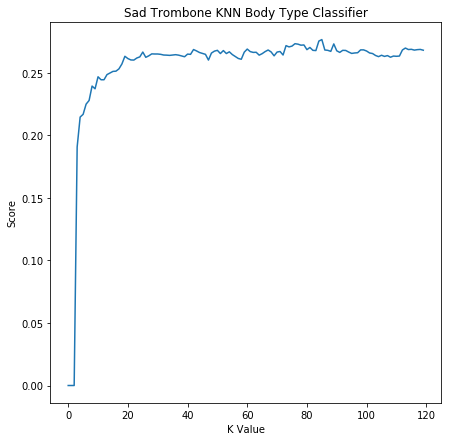

In [237]:
#visualize that score!
x = range(0,120)
plt.close('all')
plt.figure(figsize=(7,7))
plt.plot(x,knn_scores)
plt.xlabel("K Value")
plt.ylabel("Score")
plt.title("Sad Trombone KNN Body Type Classifier")
#plt.show()

for hot in range(80,90):
    print(hot, knn_scores[hot])
    
    
# And there you go, optimal K param is 85 for this sad classifier   
# Sad classifier best configuration is K=85 with a Score=0.2764
# ... upon further thought, considering this is trying to classify among 11 different bodytype categories
# ... and 1/11 is 0.0909, having a classifier be roughly 3 times better than chance is not the worst

plt.savefig("optimal_k_score_loop.png");

## Can we turn things around into an Income Regressor?

In [170]:
from sklearn.neighbors import KNeighborsRegressor

#Normalize
rmodel_df_features = model_df[['langscore', 'pets', 'petscore', 'bodytype']]
min_max_scaler = preprocessing.MinMaxScaler()
rmodel_array_scaled = min_max_scaler.fit_transform(rmodel_df_features)
rmodel_df_scaled = pd.DataFrame(rmodel_array_scaled, columns=rmodel_df_features.columns)

#Funtimes
rtraining_data, rvalidation_data, rtraining_labels, rvalidation_labels = train_test_split(rmodel_df_scaled, model_df["income"],test_size=0.2, random_state=1)
regressor = KNeighborsRegressor(n_neighbors=85, weights="distance") 
regressor.fit(rtraining_data, rtraining_labels)

#Sanity Check
#print(rvalidation_data.head())
#print(rvalidation_labels.head())

rvalidation_data_predicted = regressor.predict(rvalidation_data)
rscore = regressor.score(rvalidation_data, rvalidation_labels)

print("Income Regressor Score: ", rscore)
# Wow dang,  -0.10434 ... that is a bad regressor. 
# And I Quote: The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

Income Regressor Score:  -0.1043413142422651


## Can we come up with a more tolerant Score function 
Theory here: IF we could accept a +5k -5k divergence from predictions as "Good" would the Regressor still be terrible ?


In [180]:
def incomescorer(predictions, truelabels, tolerance):
    scores = []
    tolerance_limit = tolerance + 1
    for i in range(1, len(predictions)):
        delta = truelabels[i] - predictions[i]
        if abs(delta) < tolerance_limit:
            scores.append(1)
        else:
            scores.append(0)
    scoresum = sum(scores);
    finalscore = scoresum/float(len(scores))
    return finalscore

incomescore_5k = incomescorer(rvalidation_data_predicted.flatten().tolist(), rvalidation_labels.values, 5000)
incomescore_10k = incomescorer(rvalidation_data_predicted.flatten().tolist(), rvalidation_labels.values, 10000)
print("Predicted Income Score to within $ 5k of true measure", incomescore_5k)
print("Predicted Income Score to within $ 10k of true measure", incomescore_10k)

# OK still bad but not so pathetic as before

Predicted Income Score to within $ 5k of true measure 0.3690182084362705
Predicted Income Score to within $ 10k of true measure 0.5371946198188307


In [182]:
# Let's see if we can improve by tweaking K, even though the Classifier is optimal on K=85, maybe this regressor isn't

def get_score_for_neighbors_set_to(kval):
    regressor = KNeighborsRegressor(n_neighbors=kval, weights="distance") 
    regressor.fit(rtraining_data, rtraining_labels)
    rvalidation_data_predicted = regressor.predict(rvalidation_data)
    iscore = incomescorer(rvalidation_data_predicted.flatten().tolist(), rvalidation_labels.values, 5000)
    return iscore


income_scores = [0,0,0]
for kn in range(3,120):
    income_scores.append(get_score_for_neighbors_set_to(kn))

5 0.5126727056455302
6 0.5184371854698508
7 0.5398481105316132
8 0.536737121420075
9 0.5415866044468844
10 0.5617165339921311
11 0.5494555769054809
12 0.5599780400768597
13 0.5188031841888553
14 0.5423186018848934
15 0.5569585506450727
16 0.5407631073291244
17 0.5462530881141916
18 0.5383841156555952
19 0.5097447158934943
Optimal Score to Within $10k:  0.6863390978131576


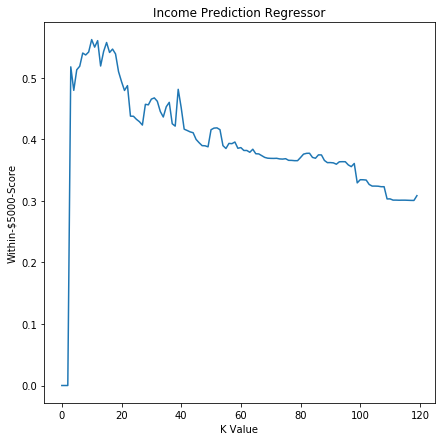

In [238]:
#visualize that score!
x = range(0,120)
plt.close('all')
plt.figure(figsize=(7,7))
plt.plot(x,income_scores)
plt.xlabel("K Value")
plt.ylabel("Within-$5000-Score")
plt.title("Income Prediction Regressor")
#plt.show()

for hotval in range(5,20):
    print(hotval, income_scores[hotval])
    
# So now we know, K=10 is optimal for this Regressor.
# Out of curiousity:
regressor = KNeighborsRegressor(n_neighbors=10, weights="distance") 
regressor.fit(rtraining_data, rtraining_labels)
rvalidation_data_predicted = regressor.predict(rvalidation_data)
iscore10n10k = incomescorer(rvalidation_data_predicted.flatten().tolist(), rvalidation_labels.values, 10000)
print("Optimal Score to Within $10k: ", iscore10n10k)
# 0.6863 ... needs improvement, let's keep a positive attitude

plt.savefig('optimal_k_income_regressor.png');

## Let's try an alternate Regressor so we can compare them!

Training Score:  0.0028537387599805175
Validation Score:  0.001230499514043748
       langscore      pets  petscore  bodytype
40429   0.777778  0.500000  0.032258  0.454545
51778   0.703704  0.428571  0.000000  0.363636
30560   0.703704  0.071429  0.096774  0.909091
19806   0.703704  0.142857  0.032258  0.181818
2741    0.777778  0.642857  0.032258  0.363636
10930
10930


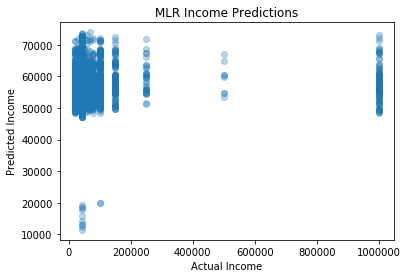

In [220]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg_model = linreg.fit(rtraining_data, rtraining_labels)
income_predicted = linreg_model.predict(rvalidation_data)

plt.scatter(rvalidation_labels, income_predicted, alpha=0.3)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("MLR Income Predictions")
#plt.show()

# If I am reading this correctly, this Regression gets almost everything wrong

training_score = linreg_model.score(rtraining_data, rtraining_labels)
validation_score = linreg_model.score(rvalidation_data, rvalidation_labels)

print("Training Score: ", training_score)
print("Validation Score: ", validation_score)

# 0.0029 and 0.0012. Yep.

# Did we forget to normalize or something like that?
print(rtraining_data.head()) #nope
# Let's ... uh, visualize the Line and get this over with
coef = linreg_model.coef_
intercept = linreg_model.intercept_
linreg_line_points = []
for coin in range(0,1093000,100):
    y = (coef * coin) + intercept
    linreg_line_points.append(y)

# Sanity Checks
print(len(linreg_line_points))
print(len(rvalidation_labels.values.tolist()))

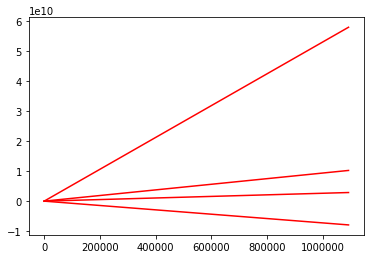

In [221]:
# Plot the Line(s)
simple_x = np.array(range(0,1093000,100))
simple_x = simple_x.reshape(-1,1)
plt.plot(simple_x, linreg_line_points, color="red")
#plt.axis([0,1000000, 0, 1000000])
plt.show()
